# Homework #1

In [216]:
from itertools import product
from typing import Callable, Tuple

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import colormaps
from numpy import empty, float64


def draw_table(
        name: str,
        constructor: Callable[[int, int], Tuple[int, int]],
        mapper: Callable[[int, int], int],
        size: int = 10,
        stretch: float = 0,
        palette: str = "viridis"
    ):
    numbers = range(1, size + 1)
    tuples = [(x, y) for x, y in product(numbers, numbers)]
    coords = [constructor(x, y) for x, y in tuples]
    values = [mapper(sn, si) for sn, si in coords]

    shells = {int(s) for s, _ in coords}
    shell_colors = {s: colormaps[palette](i / len(shells)) for i, s in enumerate(shells)}
    patches = [Patch(color=shell_colors[s], label=f"Shell #{s}") for s in shells]

    colors_arr = empty((size, size, 3), dtype=float64)
    values_arr = [[None for _ in range(size)] for _ in range(size)]
    for idx, (x, y) in enumerate(tuples):
        global_index = f"{values[idx]}" if isinstance(values[idx], int) else f"{values[idx]:.1f}"
        local_index = f"{coords[idx][1]}" if isinstance(coords[idx][1], int) else f"{coords[idx][1]:.1f}"
        values_arr[y - 1][x - 1] = f"{global_index} ({local_index})"
        colors_arr[y - 1][x - 1] = shell_colors[coords[idx][0]][:3]

    plt.figure(linewidth=2)
    table = plt.table(
        cellText=values_arr,
        cellColours=colors_arr,
        rowLabels=numbers,
        rowLoc="center",
        colLabels=numbers,
        colLoc="center",
        loc="center",
        cellLoc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.25 + stretch, 1.5)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.legend(handles=patches, fontsize=7, bbox_to_anchor=(1.5 + stretch / 2, 1))
    plt.box(on=None)
    plt.suptitle(name)
    plt.show()

## Shell-Based Methodology
### Question 2

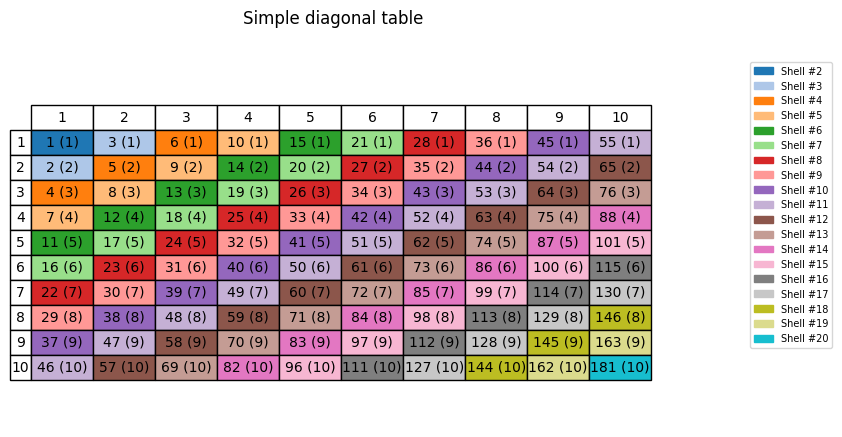

In [217]:
from math import comb
from typing import Tuple


def simple_constructor(x: int, y: int) -> Tuple[int, int]:
    return x + y, y


def simple_mapper(a: int, b: int) -> int:
    return comb(a, 2) - b + 1


draw_table("Simple diagonal table", simple_constructor, simple_mapper, palette="tab20")

### Question 3

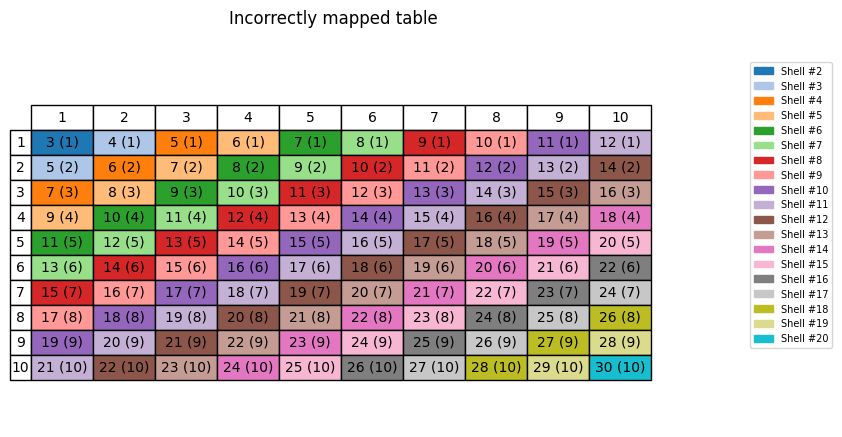

In [218]:
from typing import Tuple


def incorrect_constructor(x: int, y: int) -> Tuple[int, int]:
    return x + y, y


def incorrect_mapper(a: int, b: int) -> int:
    return a + b


draw_table("Incorrectly mapped table", incorrect_constructor, incorrect_mapper, palette="tab20")

### Question 4

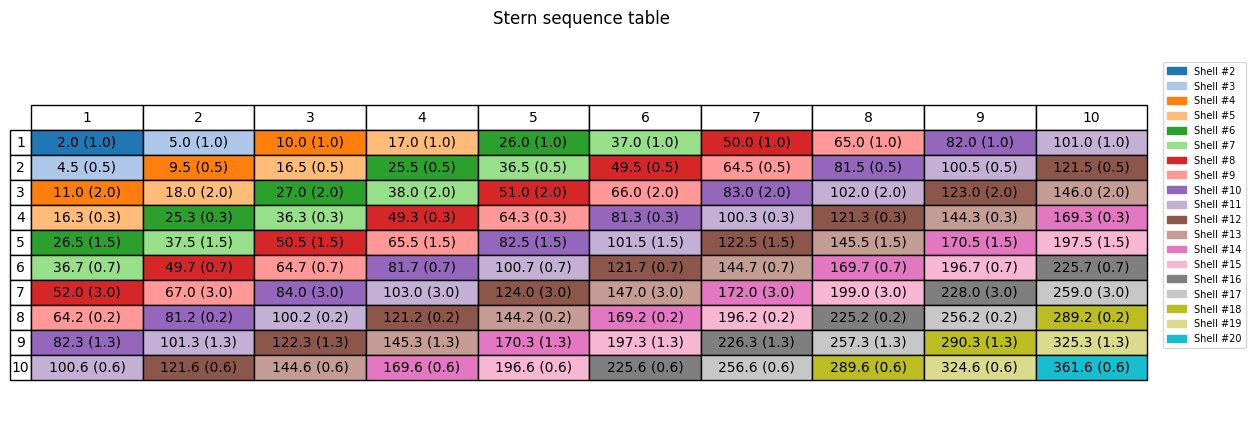

In [219]:
from functools import cache
from typing import Tuple


@cache
def stern(index: int) -> int:
    if index <= 1:
        return index
    else:
        return stern(index // 2) if index % 2 == 0 else stern((index - 1) // 2) + stern((index + 1) // 2)


def stern_constructor(x: int, y: int) -> Tuple[int, int]:
    return x + y, stern(y) / stern(y + 1)


def stern_mapper(a: int, b: int) -> int:
    return ((a - 1) ** 2) + b


draw_table("Stern sequence table", stern_constructor, stern_mapper, stretch=1.0, palette="tab20")

## The Square-Shell function σ
### Question 5

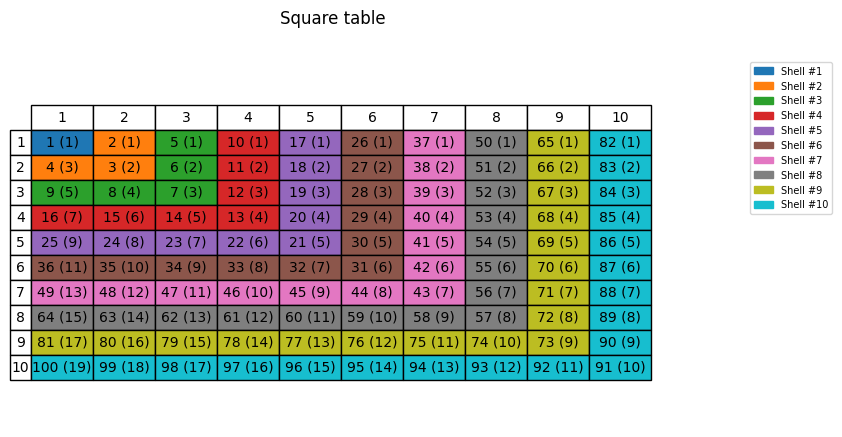

In [220]:
from typing import Tuple


def square_constructor(x: int, y: int) -> Tuple[int, int]:
    m = max(x - 1, y - 1)
    return m + 1, m + y - x + 1


def square_mapper(a: int, b: int) -> int:
    return ((a - 1) ** 2) + b


draw_table("Square table", square_constructor, square_mapper, palette="tab20")

### Question 6

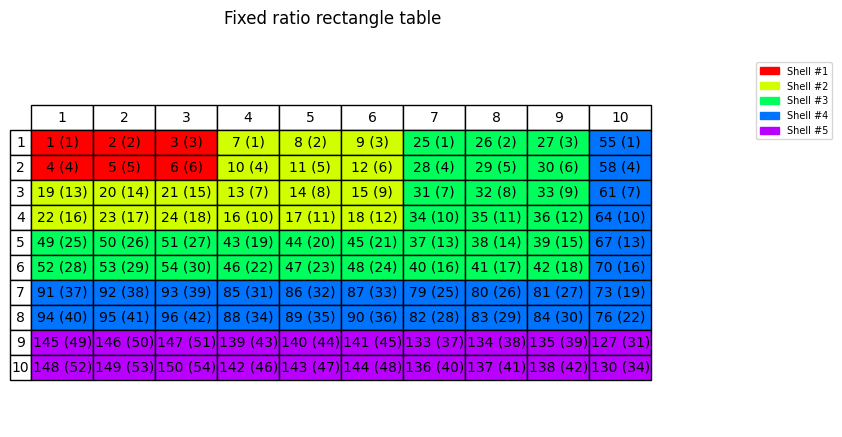

In [221]:
from typing import Tuple


DIMENS = 3, 2


def fixed_rect_constructor(x: int, y: int) -> Tuple[int, int]:
    d1, d2 = DIMENS
    prod = d1 * d2
    m = max((x - 1) // d1, (y - 1) // d2)
    value = ((x - 1) % d1) + (y - 1) * d1
    subs = ((x - 1) // d1) * prod
    return m + 1, m * prod + value - subs + 1


def fixed_rect_mapper(a: int, b: int) -> int:
    d1, d2 = DIMENS
    return (d1 * d2) * ((a - 1) ** 2) + b


draw_table("Fixed ratio rectangle table", fixed_rect_constructor, fixed_rect_mapper, palette="hsv")